<a href="https://colab.research.google.com/github/mellysekhan17/Final-Project-KM/blob/main/FP_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**FINAL PROJECT 1**
Project untuk memenuhi tugas akhir studi independen kampus merdeka  Introduction To Python For Data Science Hactiv8.

**Anggota Kelompok:**
1. Fasal Alif Haikal Irawan
2. Diki Dwi Aji
3. Mely Sekhan

#**1. PENDAHULUAN**

##**A. Latar Belakang**

Uber adalah salah satu perusahaan transportasi yang cukup besar. Uber memberikan layanan kepada pelanggan setiap hari. Sangat penting untuk mengelola data dengan benar untuk menghasilkan ide bisnis baru supaya mendapatkan hasil terbaik bagi perusahaan. 

Poject ini dilakukan sebagai salah satu action mengelola data perusahaan dengan tujuan untuk memperkirakan tarif layanan transportasi yang disediakan perusahaan secara akurat guna memberikan insight baru untuk perusahaan.

##**B. Dataset**

Dataset yang digunakan adalah Uber vs Lyft Dataset New York, USA yang berisi record data perjalanan taksi online Uber dan Lyft di New York, USA. Dataset ini memiliki 57 atribut, namun data yang diperlukan untuk proyek ini antara lain:

- layanan: Jenis layanan transportasi online (Uber, Lyft).
- kendaraan: Jenis kendaraan (Lux, Lux Black XL, Lyft, Lyft XL, UberXL, Taxi, Uberpool, Black SUV, WAV, Black, UberX, Lux Black, Shared).
- jam: Waktu pemesanan transportasi (24 jam).
- tanggal: Tanggal transportasi dipesan.
- bulan: Bulan transportasi dipesan (bulan 11 dan 12).
- awal: Titik penjemputan.
- tujuan: Destinasi akhir.
- tarif: Harga transportasi online (dollar US).

Source : Kaggle

##**C. Objektif**

- Memberikan insight mengenai isi data untuk perusahaan dan customer.
- Mengetahui faktor-faktor yang berpengaruh signifikan dalam memprediksi tarif harga transportasi online.
- membuat model machine learning untuk memprediksi tarif transportasi online.

#**2. LIBRARY**

In [ ]:
#Data manipulasi
import pandas as pd
import numpy as np
pd.options.display.max_rows = None
pd.options.display.max_columns = None

#Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

#Prepocessing dan modeling
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
le = preprocessing.LabelEncoder()
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import pickle

#Handle warning
import warnings
warnings.filterwarnings('ignore')

#**3. DATA LOAD**

In [ ]:
#Import dataset
data = pd.read_csv("/content/rideshare_kaggle.csv") 

In [ ]:
#Menampilkan dataset
data.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1.544980e+09,39.89,1.545012e+09,43.68,1.544969e+09,33.73,1.545012e+09,38.07,1.544958e+09
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1.543252e+09,40.49,1.543234e+09,47.30,1.543252e+09,36.20,1.543291e+09,43.92,1.543252e+09
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1.543338e+09,35.36,1.543378e+09,47.55,1.543320e+09,31.04,1.543378e+09,44.12,1.543320e+09
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1.543507e+09,34.67,1.543550e+09,45.03,1.543511e+09,30.30,1.543550e+09,38.53,1.543511e+09
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1.543421e+09,33.10,1.543403e+09,42.18,1.543421e+09,29.11,1.543392e+09,35.75,1.543421e+09


In [ ]:
#Menampilkan info dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88986 entries, 0 to 88985
Data columns (total 57 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           88986 non-null  object 
 1   timestamp                    88986 non-null  float64
 2   hour                         88986 non-null  int64  
 3   day                          88986 non-null  int64  
 4   month                        88986 non-null  int64  
 5   datetime                     88986 non-null  object 
 6   timezone                     88986 non-null  object 
 7   source                       88986 non-null  object 
 8   destination                  88986 non-null  object 
 9   cab_type                     88986 non-null  object 
 10  product_id                   88986 non-null  object 
 11  name                         88986 non-null  object 
 12  price                        81975 non-null  float64
 13  distance        

In [ ]:
#Menampilkan struktur dataset
data.shape
print("Data terdiri dari",len(data), "dan",len(data.columns), 'kolom')

Data terdiri dari 88986 dan 57 kolom


In [ ]:
#Menampilkan unique values setiap kolom
data.nunique()

id                             88986
timestamp                      33378
hour                              24
day                               17
month                              2
datetime                       29096
timezone                           1
source                            12
destination                       12
cab_type                           2
product_id                        13
name                              13
price                            119
distance                         497
surge_multiplier                   7
latitude                          11
longitude                         12
temperature                      308
apparentTemperature              319
short_summary                      9
long_summary                      11
precipIntensity                   63
precipProbability                 29
humidity                          51
windSpeed                        291
windGust                         286
windGustTime                      25
v

In [ ]:
#Menampilkan infomasi missing value pada dataset
data.isnull().sum().sum()

7020

- Terdapat 55095 missing value pada dataset

In [ ]:
#Menampilkan informasi data duplikat pada dataset
data.duplicated().sum()

0

- Tidak ada data duplikat

#**4. DATA CLEANING**

##A. Missing Value

In [ ]:
#Menampilkan jumlah missing value
data.isnull().sum().sum()

7020

In [ ]:
#Menghapus missing value
data.dropna(axis=0,inplace=True)

In [ ]:
#Missing value clean
data.isnull().sum().sum()

0

##B. Drop variable tidak terpakai

In [ ]:
#Menghapus kolom yang tidak digunakan untuk eksplorasi data untuk menghasilkan dataframe baru
df = data.drop(['id','timestamp','datetime','long_summary','apparentTemperatureHighTime','apparentTemperatureLowTime',
                'apparentTemperatureLowTime','windGustTime','sunriseTime','sunsetTime','uvIndexTime','temperatureMinTime',
                'temperatureMaxTime','apparentTemperatureMinTime','temperatureLowTime','apparentTemperatureMaxTime',
                'temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh', 'visibility.1',
                'apparentTemperatureLow','temperatureMin','temperatureHighTime','temperatureMax','apparentTemperatureMin',
                'apparentTemperatureMax', 'precipIntensity', 'precipProbability', 'humidity', 'windSpeed','windGust',
                'visibility', 'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'ozone', 'moonPhase', 'precipIntensityMax',
                'timezone','product_id','distance','surge_multiplier', 'latitude','longitude','short_summary','icon'],axis=1)

In [ ]:
#Menampilkan data
df.head()

,hour,day,month,source,destination,cab_type,name,price
0,9,16,12,Haymarket Square,North Station,Lyft,Shared,5.0
1,2,27,11,Haymarket Square,North Station,Lyft,Lux,11.0
2,1,28,11,Haymarket Square,North Station,Lyft,Lyft,7.0
3,4,30,11,Haymarket Square,North Station,Lyft,Lux Black XL,26.0
4,3,29,11,Haymarket Square,North Station,Lyft,Lyft XL,9.0


##C. Mengubah nama kolom

In [ ]:
#Mengubah nama kolom untuk memudahkan analisis dan ekplorasi
dict = {'hour': 'waktu',
        'day': 'tanggal',
        'month': 'bulan',
        'source': 'awal',
        'destination': 'tujuan',
        'cab_type': 'layanan',
        'name': 'kendaraan',
        'distance': 'jarak',
        'price': 'tarif'}

df.rename(columns=dict,
          inplace=True)

In [ ]:
#Menampilkan data
df.head()

,waktu,tanggal,bulan,awal,tujuan,layanan,kendaraan,tarif
0,9,16,12,Haymarket Square,North Station,Lyft,Shared,5.0
1,2,27,11,Haymarket Square,North Station,Lyft,Lux,11.0
2,1,28,11,Haymarket Square,North Station,Lyft,Lyft,7.0
3,4,30,11,Haymarket Square,North Station,Lyft,Lux Black XL,26.0
4,3,29,11,Haymarket Square,North Station,Lyft,Lyft XL,9.0


##D. Outlier

In [ ]:
#Membuat variable baru berisi kolom dengan data continous untuk melihat keberadaan outlier
continous = df.select_dtypes(include=['float','int']).columns.tolist()
continous

['waktu', 'tanggal', 'bulan', 'tarif']

              waktu       tanggal         bulan         tarif
count  81974.000000  81974.000000  81974.000000  81974.000000
mean      11.563606     17.993730     11.575548     16.583459
std        6.984679      9.975657      0.494263      9.360443
min        0.000000      1.000000     11.000000      2.500000
25%        5.000000     13.000000     11.000000      9.000000
50%       12.000000     17.000000     12.000000     13.500000
75%       18.000000     28.000000     12.000000     22.500000
max       23.000000     30.000000     12.000000     92.000000


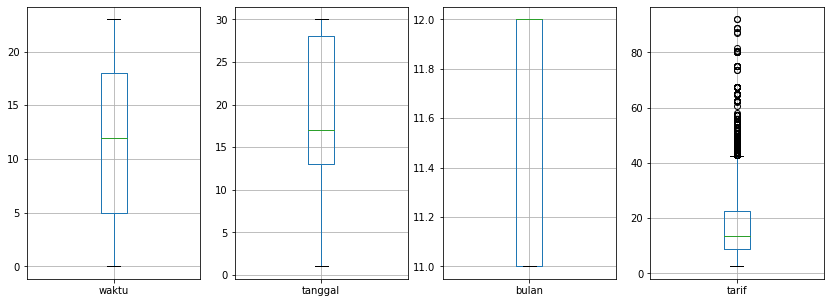

In [ ]:
#Informasi statistik sebelum handling outliers
print(df[['waktu',
 'tanggal',
 'bulan',
 'tarif']].describe()) 

#Menampilkan outlier
names = continous
plt.figure(figsize=(18,5))
for i in range(1,5):
    
    plt.subplot(1,5,i)
    fig=df.boxplot(column=names[i-1])

- terdapat outlier di kolom tarif

In [ ]:
#HANDLING OUTLIERS DENGAN METODE IQR
Q1 = (df[['waktu', 'tanggal', 'bulan', 'tarif']]).quantile(0.25)
Q3 = (df[['waktu', 'tanggal', 'bulan', 'tarif']]).quantile(0.75)
IQR = Q3 - Q1
maximum = Q3 + (1.5*IQR)
print('Nilai Maximum dari masing-masing Variable adalah: ')
print(maximum)
minimum = Q1 - (1.5*IQR)
print('\nNilai Minimum dari masing-masing Variable adalah: ')
print(minimum)

Nilai Maximum dari masing-masing Variable adalah: 
waktu      37.50
tanggal    50.50
bulan      13.50
tarif      42.75
dtype: float64

Nilai Minimum dari masing-masing Variable adalah: 
waktu     -14.50
tanggal    -9.50
bulan       9.50
tarif     -11.25
dtype: float64


- Menampilkan nilai minimum dan maksimum dari setiap kolom


Persebaran data setelah ditangani Outlier: 
              waktu       tanggal         bulan         tarif
count  81974.000000  81974.000000  81974.000000  81974.000000
mean      11.563606     17.993730     11.575548     16.511565
std        6.984679      9.975657      0.494263      9.091191
min        0.000000      1.000000     11.000000      2.500000
25%        5.000000     13.000000     11.000000      9.000000
50%       12.000000     17.000000     12.000000     13.500000
75%       18.000000     28.000000     12.000000     22.500000
max       23.000000     30.000000     12.000000     42.750000


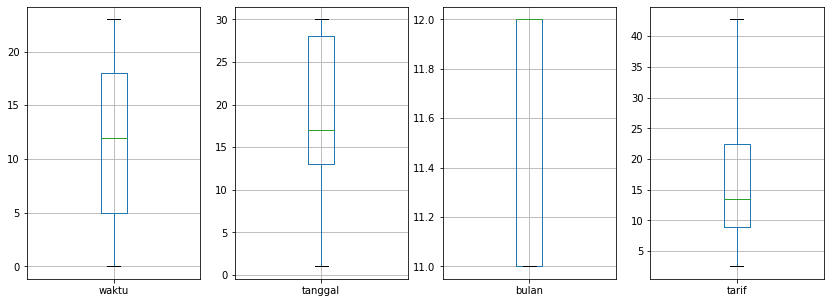

In [ ]:
#Menghapus outlier
more_than = (df> maximum)
lower_than = (df < minimum)
df = df.mask(more_than, maximum, axis=1)
df = df.mask(lower_than, minimum, axis=1)
print('\nPersebaran data setelah ditangani Outlier: ')
print(df[['waktu', 'tanggal', 'bulan', 'tarif']].describe())

#Menampilkan hasi handling ourlier
names = continous
plt.figure(figsize=(18,5))
for i in range(1,5):
    
    plt.subplot(1,5,i)
    fig=df.boxplot(column=names[i-1])

- Tidak terdapat outlier di dataset

#**5. EKSPLORATORY DAN VISUALISASI DATA**

In [ ]:
#Menamppilkan dataset
df.head()

,waktu,tanggal,bulan,awal,tujuan,layanan,kendaraan,tarif
0,9,16,12,Haymarket Square,North Station,Lyft,Shared,5.0
1,2,27,11,Haymarket Square,North Station,Lyft,Lux,11.0
2,1,28,11,Haymarket Square,North Station,Lyft,Lyft,7.0
3,4,30,11,Haymarket Square,North Station,Lyft,Lux Black XL,26.0
4,3,29,11,Haymarket Square,North Station,Lyft,Lyft XL,9.0


In [ ]:
#Menampilkan informasi statistik pada dataset
df.describe()

,waktu,tanggal,bulan,tarif
count,81974.000000,81974.000000,81974.000000,81974.000000
mean,11.563606,17.993730,11.575548,16.511565
std,6.984679,9.975657,0.494263,9.091191
min,0.000000,1.000000,11.000000,2.500000
25%,5.000000,13.000000,11.000000,9.000000
50%,12.000000,17.000000,12.000000,13.500000
75%,18.000000,28.000000,12.000000,22.500000
max,23.000000,30.000000,12.000000,42.750000


##A. Univariate Eksploration

In [ ]:
#Mmembuat pendefinisian untuk plot
def plot_bar(groupby_column):
    df1 =df.groupby(groupby_column).size().reset_index(name="counts")
    fig1 = px.bar(data_frame=df1, x=groupby_column, y="counts", color=groupby_column, barmode="group")
    print(df1)
    fig1.show()

###**1. Analisis waktu**

In [ ]:
#Eksplorasi berdasarkan kolom waktu
plot_bar('waktu')

    waktu  counts
0       0    3914
1       1    3471
2       2    3574
3       3    3220
4       4    3423
5       5    2978
6       6    3245
7       7    2928
8       8    2874
9       9    3468
10     10    3564
11     11    3548
12     12    3511
13     13    3537
14     14    3554
15     15    3563
16     16    3547
17     17    3476
18     18    3491
19     19    3248
20     20    3235
21     21    3293
22     22    3521
23     23    3791


- distribusi data cukup rata disetiap jam

In [ ]:
#Eksplorasi berdasarkan kolom tanggal
plot_bar('tanggal')

    tanggal  counts
0         1    5291
1         2    5138
2         3    5134
3         4    1463
4         9     225
5        10     375
6        13    4617
7        14    5222
8        15    5153
9        16    5202
10       17    5190
11       18    4170
12       26    3923
13       27    8962
14       28    9134
15       29    7498
16       30    5277


- beberapa tanggal tidak ada data
- tanggal 27, 28, 29 di setiap bulan memiliki record yang tinggi

In [ ]:
#Eksplorasi berdasarkan kolom bulan
plot_bar('bulan')

   bulan  counts
0     11   34794
1     12   47180


- data hanya berisi di bulan 11 dan 12
- bulan 12 memiliki lebih banyak data

###**2. Analisis titik penjemputan dan tujuan**

In [ ]:
#Eksplorasi titik penjemputan berdasarkan kolom awal
plot_bar('awal')

                       awal  counts
0                  Back Bay    6861
1               Beacon Hill    6914
2         Boston University    6663
3                    Fenway    6504
4        Financial District    7013
5          Haymarket Square    6848
6                 North End    6710
7             North Station    6715
8   Northeastern University    6776
9             South Station    6731
10         Theatre District    7128
11                 West End    7111


- distribusi titik penjemputan rata

In [ ]:
#Eksplorasi titik destinasi berdasarkan kolom tujuan
plot_bar('tujuan')

                     tujuan  counts
0                  Back Bay    6661
1               Beacon Hill    6760
2         Boston University    7208
3                    Fenway    7062
4        Financial District    6775
5          Haymarket Square    7002
6                 North End    7058
7             North Station    6730
8   Northeastern University    7083
9             South Station    6329
10         Theatre District    6936
11                 West End    6370


- distribusi titik tujuan rata

###**3. Analisis jenis layanan**

In [ ]:
#Eksplorasi berdasarkan kolom layanan
plot_bar('layanan')

  layanan  counts
0    Lyft   39925
1    Uber   42049


- Jnis layanan uber lebih sering dipesan dibandingkan dengan yft. Selisihnya tidak terlalu besar

###**4. Analisis tarif**

In [ ]:
#Eksplorasi berdasarkan kolom tarif
plot_bar('tarif')

    tarif  counts
0    2.50      29
1    3.00     689
2    3.50     712
3    4.50      50
4    5.00    1774
5    5.50     292
6    6.00      67
7    6.50     632
8    7.00    6743
9    7.50    2244
10   8.00    1865
11   8.50    2265
12   9.00    3978
13   9.50    2883
14  10.00     922
15  10.50    5202
16  11.00    2832
17  11.50    1430
18  12.00     803
19  12.50     752
20  13.00     789
21  13.50    4273
22  14.00     856
23  14.50     193
24  15.00    1469
25  15.50     353
26  16.00    1649
27  16.50    5695
28  17.00     805
29  17.50     566
30  18.00     413
31  18.50     644
32  19.00     190
33  19.50    3483
34  20.00      13
35  20.50     624
36  21.00     156
37  21.50     450
38  22.00     255
39  22.50    3428
40  23.00     455
41  23.50     170
42  24.00     439
43  24.50      47
44  25.00     432
45  25.50      39
46  26.00    3451
47  26.50     622
48  27.00     620
49  27.50    3592
50  28.00     221
51  28.50     417
52  29.00     104
53  29.50     511
54  30.00 

- distribusi tarif rata-rata di harga 7-30 dollar

##B. Bivariate Eksploration

In [ ]:
#Menampilkan data
df.head()

,waktu,tanggal,bulan,awal,tujuan,layanan,kendaraan,tarif
0,9,16,12,Haymarket Square,North Station,Lyft,Shared,5.0
1,2,27,11,Haymarket Square,North Station,Lyft,Lux,11.0
2,1,28,11,Haymarket Square,North Station,Lyft,Lyft,7.0
3,4,30,11,Haymarket Square,North Station,Lyft,Lux Black XL,26.0
4,3,29,11,Haymarket Square,North Station,Lyft,Lyft XL,9.0


###**1. Analisis rata-rata harga vs jenis layanan dan source**

In [ ]:
#Menampilkan tarif rata-rata berdasarkan jenis layanan dana titik jemput
df.groupby(by=["layanan","awal"]).tarif.agg(["mean"])

mean
layanan awal                              
Lyft    Back Bay                 16.500624
        Beacon Hill              16.420102
        Boston University        20.074969
        Fenway                   19.441195
        Financial District       18.686964
        Haymarket Square         13.764585
        North End                15.857543
        North Station            16.875293
        Northeastern University  18.992371
        South Station            16.322745
        Theatre District         18.073232
        West End                 16.851906
Uber    Back Bay                 15.339491
        Beacon Hill              14.913376
        Boston University        17.824459
        Fenway                   16.882073
        Financial District       17.739118
        Haymarket Square         13.507591
        North End                14.534982
        North Station            15.766606
        Northeastern University  16.859132
        South Station            15.182372
        Theatre District         15.125199
        West End                 15.527511

- tarif rata-rata jenis layanan terhadap titik penjemputan tidak menunjukkan selisih yang signifikan

###**2. Analisis harga vs jenis layanan dan tujuan**

In [ ]:
#Menampilkan harga rata-rata berdasarkan jenis layanan dana titik tujuan
df.groupby(by=["layanan","tujuan"]).tarif.agg(["mean"])

mean
layanan tujuan                            
Lyft    Back Bay                 17.221163
        Beacon Hill              16.823719
        Boston University        20.113871
        Fenway                   19.222038
        Financial District       18.763967
        Haymarket Square         14.570859
        North End                15.584550
        North Station            17.639158
        Northeastern University  18.743436
        South Station            14.971027
        Theatre District         16.922285
        West End                 16.809968
Uber    Back Bay                 15.514697
        Beacon Hill              15.749781
        Boston University        17.496041
        Fenway                   17.225292
        Financial District       16.921801
        Haymarket Square         13.951899
        North End                14.400936
        North Station            16.027801
        Northeastern University  16.571738
        South Station            14.490620
        Theatre District         15.115792
        West End                 15.444862

- tarif rata-rata jenis layanan terhadap titik tujuan tidak menunjukkan selisih yang signifikan

###**3. jenis layanan vs hari dan jam**

In [ ]:
#Menampilkan distribusi pemesanan jenis layanan berdasarkan tanggal
df2 =df.groupby(by=["tanggal","layanan"]).size().reset_index(name="counts")
fig2 = px.bar(data_frame=df2, x="tanggal", y="counts", color="layanan", barmode="group")
fig2.show()

- Layanan uber paling sering dipesan

In [ ]:
#Menampilkan distribusi pemesanan jenis layanan berdasarkan waktu
df2 =df.groupby(by=["waktu","layanan"]).size().reset_index(name="counts")
fig2 = px.bar(data_frame=df2, x="waktu", y="counts", color="layanan", barmode="group")
fig2.show()

- layanan uber paling sering dipesan

###**4. Kendaraan vs jenis layanan**

In [ ]:
#Menampilkan distribusi jenis kendaraan berdasarkan jenis layanan
df2 =df.groupby(by=["layanan","kendaraan"]).size().reset_index(name="counts")
fig2 = px.bar(data_frame=df2, x="layanan", y="counts", color="kendaraan", barmode="group")
fig2.show()

- Setiap jenis layanan memiliki distribusi yang rata untuk semua jenis kendaraan

#**6. DATA PREPROCESSING**

In [ ]:
#Menampilkan data
df.head(2)

,waktu,tanggal,bulan,awal,tujuan,layanan,kendaraan,tarif
0,9,16,12,Haymarket Square,North Station,Lyft,Shared,5.0
1,2,27,11,Haymarket Square,North Station,Lyft,Lux,11.0


##**A. Encoding (one-hot encoding)**

In [ ]:
#Melakukan encoding dengan Label Encoder pada atribut yang memiliki tipe data Object.
class MultiColumnLabelEncoder:
    def __init__(self, columns=None):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname, col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self, X, y=None):
        return self.fit(X, y).transform(X)


encoding_pipeline = Pipeline([
    ('encoding', MultiColumnLabelEncoder(columns=["waktu", "tanggal", "bulan", "tarif", "awal", "tujuan", "layanan", "kendaraan"]))
])

#Membuat variabel df_rfe untuk menampung hasil encode
df_en = encoding_pipeline.fit_transform(df)

In [ ]:
df_en.head()

,waktu,tanggal,bulan,awal,tujuan,layanan,kendaraan,tarif
0,9,9,1,5,7,0,7,4
1,2,13,0,5,7,0,2,16
2,1,14,0,5,7,0,5,8
3,4,16,0,5,7,0,4,46
4,3,15,0,5,7,0,6,12


##**B. Features selection**

In [ ]:
#Menentukan variable target dan feature
target = df_en['tarif']
features = df_en.drop('tarif', axis=1)

#Features selection
selected_univariate = SelectKBest(f_regression, k=5).fit(features, target)
feature_mask = selected_univariate.get_support()

In [ ]:
#Menampilkan hasil features selection
pd.DataFrame({'FeatureName' : features.columns, 'Score' : selected_univariate.scores_}).sort_values(by='Score', ascending=False).reset_index()

,index,FeatureName,Score
0,6,kendaraan,45800.991522
1,5,layanan,604.270823
2,4,tujuan,216.230070
3,3,awal,36.114529
4,0,waktu,0.526071
5,1,tanggal,0.406530
6,2,bulan,0.015372


- Untuk langkah selanjutnya akan menggunakan kolom kendaraan, layanan, tujuan, dan awal
- kolom jarak tidak di gunakan karena bisa digantikan dengan kolom awal dan tujuan

In [ ]:
#Menampilkan kolom features yang terpilih
df = df[['tarif', 'kendaraan', 'layanan', 'tujuan', 'awal']]
df.head()

,tarif,kendaraan,layanan,tujuan,awal
0,5.0,Shared,Lyft,North Station,Haymarket Square
1,11.0,Lux,Lyft,North Station,Haymarket Square
2,7.0,Lyft,Lyft,North Station,Haymarket Square
3,26.0,Lux Black XL,Lyft,North Station,Haymarket Square
4,9.0,Lyft XL,Lyft,North Station,Haymarket Square


In [ ]:
#Menyimpan 6 kolom features terbaik dalam dataframe baru
new_df = df_en[['tarif', 'kendaraan', 'layanan', 'tujuan', 'awal']]
#Menampilkan dataset terbaaru
new_df.head()

,tarif,kendaraan,layanan,tujuan,awal
0,4,7,0,7,5
1,16,2,0,7,5
2,8,5,0,7,5
3,46,4,0,7,5
4,12,6,0,7,5


##**C. Cek ulang missing value**

In [ ]:
#Mengecek ulang missing value pada data fix
new_df.isnull().sum().sum()

0

- tidak ada missing value

##**D. Cek ulang data outlier**

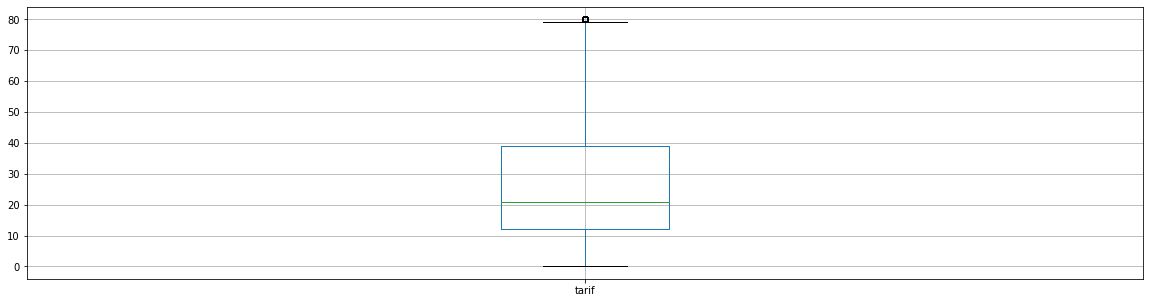

In [ ]:
#Menampilkan plot data outlier untuk kolom tarif
plt.figure(figsize=(20,5))
new_df.boxplot('tarif')

- Tidak ada ouliter

#**7. PENDEFINISIAN MODEL**

Setelah melakukan data cleaning dan data preprocessing, diperoleh dataframe baru yang akan digunakan di tahap selanjutnya. Terdapat 6 atribut yang akan digunakan untuk membuat model prediksi tarif, yaitu Layanan, Kendaraan, Awal, Tujuan, Jarak, dan Surge_multiplier.

Metode pengujian yang akan diimplementasikan pada project kali ini adalah metode Linear Regression, Random Forest, dan Decision Tree Regressor. 

Ada berbagai metrics untuk mengukur kinerja model regresi. Namun, pada project ini akan menggunakan metrik R-squares dan RMSE (Root-mean-square-error) untuk mengukur kinerja model.

##**A. Model Linear regression**

Linear Regression adalah salah satu model paling sederhana untuk melakukan sebuah estimasi atau prediksi hubungan antara dua variabel dalam penelitian kuantitatif. Dimana regresi linear ini mampu membuat satu asumsi tambahan yang mengkorelasikan antara variabel independen dan dependen melalui garis yang paling sesuai dari titik data garis lurus.

Model ini cocok untuk diterapkan di project ini karena sesuai dengan objective yang ingin di capai, yaitu estimasi atau prediksi

In [ ]:
#Definisi model linear regresi
reg = LinearRegression()

##**B. Decision Tree Regressor**

Regresi logistik adalah metode statistik yang digunakan untuk membangun model pembelajaran mesin di mana variabel dependennya dalam bentuk biner. Regresi logistik digunakan untuk menggambarkan data dan hubungan antara satu variabel dependen dan satu atau lebih variabel independen. Variabel independen dapat berupa tipe nominal, ordinal, atau interval.

Model ini bisa diterapkan pada project ini karena bisa melakukan hubungan multivariable independen, dimana sesuai dengan final goals yaitu memprediksi tarif sebagai variable dependen berdsarkan beberapa variable independen dalam dataset

In [ ]:
#Definisi model Decision tree regressor
regressor = DecisionTreeRegressor(random_state = 0,max_depth=3) 

#**8. MODELLING**

In [ ]:
#Membuat variable x dan y
X = new_df.drop(columns=['tarif'],axis=1)
y = new_df['tarif']


In [ ]:
#Menampilkan variable x
X.head()

,kendaraan,layanan,tujuan,awal
0,7,0,7,5
1,2,0,7,5
2,5,0,7,5
3,4,0,7,5
4,6,0,7,5


In [ ]:
#Menampilkan variable y
y.head()

0     4
1    16
2     8
3    46
4    12
Name: tarif, dtype: int64

In [ ]:
#Split test dan train
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=0)

In [ ]:
#Menampilkan hasil split
print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (65579, 4)
X_test shape: (16395, 4)
y_train shape: (65579,)
y_test shape: (16395,)


##**A. Linear Regression**

In [ ]:
#Model linear regression
model = reg.fit(X_train,y_train)

In [ ]:
#Fit data training ke model
model = reg.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(f'Train Accuracy {round(model.score(X_train, y_train)*100, 2)}%')
print(f'Test Accuracy {round(model.score(X_test, y_test)*100, 2)}%')

Train Accuracy 36.94%
Test Accuracy 37.12%


In [ ]:
#Nilai intercept model linear regression
model.intercept_

45.47618409433666

In [ ]:
# Nilai koefisien model linear regression
model.coef_

array([-3.26767727,  3.4465636 , -0.27604615, -0.11522389])

##**B. Decision Tree Regressor**

In [ ]:
#Model Decision Tree Regressor
model2 = regressor.fit(X_train,y_train)

In [ ]:
y_pred=model2.predict(X_test)
print(f'Train Accuracy {round(model2.score(X_train, y_train)*100, 2)}%')
print(f'Test Accuracy {round(model2.score(X_test, y_test)*100, 2)}%')

Train Accuracy 71.34%
Test Accuracy 71.17%


#**9. EVALUASI MODEL**

##**A. Linear Regression**

In [ ]:
#Train model linear regression
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [ ]:
#Menampilkan nilai train dan test
print('Nilai Mean Squared Error Train: ', mean_squared_error(y_train, y_train_pred))
print('Nilai Mean Squared Error tEST:', mean_squared_error(y_test, y_test_pred))
print('Nilai RMSE adalah: ', rmse)

Nilai Mean Squared Error Train:  208.47059376257965
Nilai Mean Squared Error tEST: 206.53900194712025
Nilai RMSE adalah:  9.731452485454419


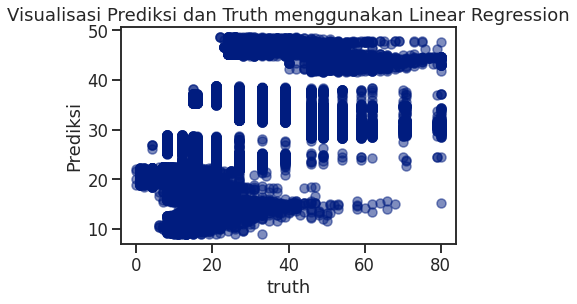

In [ ]:
#Set Visualisasi linear regression
sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = plt.axes()
# Visualisasi menggunakan y_test, y_test_pred
ax.scatter(y_test, y_test_pred, alpha=.5)

ax.set(xlabel='truth', 
       ylabel='Prediksi',
       title='Visualisasi Prediksi dan Truth menggunakan Linear Regression');

- Hasil model menunjukkan persebaran data TIDAK linier

##**B. Decision Tree Regressor**

In [ ]:
#Train model Decision Tree Regressor
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
y_train_pred = model2.predict(X_train)
y_test_pred = model2.predict(X_test)

In [ ]:
#Menampilkan mse nilai train, test, dan rmse
print('Nilai Mean Squared Error Train: ', mean_squared_error(y_train, y_train_pred))
print('Nilai Mean Squared Error Tesr: ', mean_squared_error(y_test, y_test_pred))
print('Nilai RMSE ', rmse)

Nilai Mean Squared Error Train:  94.7514081144913
Nilai Mean Squared Error Tesr:  94.70116747665699
Nilai RMSE  9.731452485454419


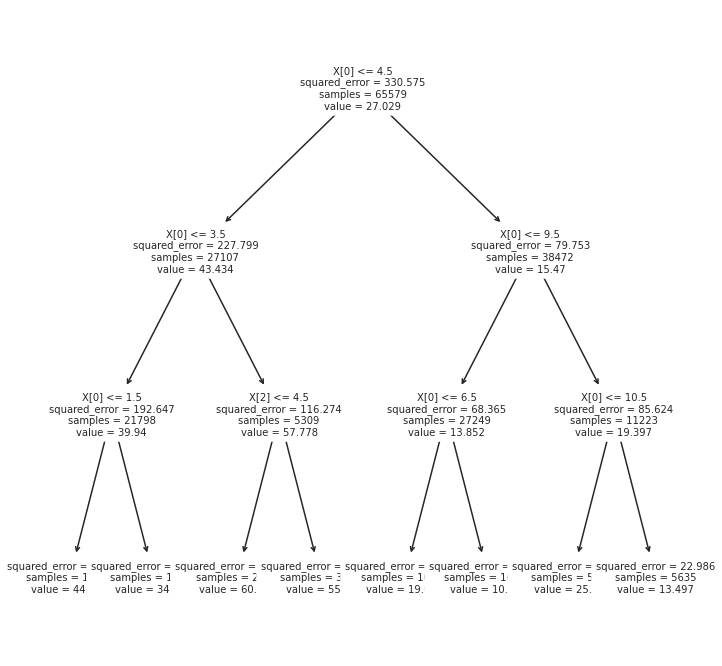

In [ ]:
#Menampilkan plot tree
plt.figure(figsize=(12,12))  # set plot size
tree.plot_tree(model2, fontsize=10)
plt.show()

#**10. MODEL INFERENCE**

In [ ]:
#Contoh dataframe baru untuk menerapkan model
pred = {'kendaraan': [1, 2, 3], 'layanan': [1, 2, 1], 'awal': [1, 7, 3], 'tujuan': [4, 2, 1]}
pred = pd.DataFrame(pred)
pred

,kendaraan,layanan,awal,tujuan
0,1,1,1,4
1,2,2,7,2
2,3,1,3,1


##Prediksi tarif dengan linear regression

In [ ]:
pred1 = model.predict(pred)
print('Prediksi Tarif dengan model Linear Regression: ')
print(pred1)

Prediksi Tarif dengan model Linear Regression: 
[44.91812873 43.67118593 38.17635355]


##Prediksi tarif dengan Decision Tree Regressor

In [ ]:
pred2 = model2.predict(pred)
print('Prediksi Tarif dengan model Decision Tree Regresor: ')
print(pred2)

Prediksi Tarif dengan model Decision Tree Regresor: 
[44.71084337 34.8941754  34.8941754 ]


#**11. KESIMPULAN**

Dari penyelesaian project ini, dabat ditarik kesimpulan sebagai berikut:

- Dari 57 atribut original dataset, terdapat atribut yang paling berpengaruh dalam melakukan prediksi tarif layanan taksi online, diantaranya adalah atribut layanan, kendaraan, awal, dan tujuan.
- Project ini menggunakan 2 metode metode Machine Learning untuk memprediksi tarif taxi oneline, yaitu linear regression, dan decision tree regressor dengan masing - masing nilai akurasi 36% dan 71%.
- Model Decision Tree Reegressor adalah model yang paling optimal untuk melakukan prediksi pada project ini



---



In [ ]:
pickle.dump(model, open('model.pkl', "wb"))
pickle.dump(model2, open('model2.pkl', "wb"))